<a href="https://colab.research.google.com/github/SuperGeekBrain/coal-exploration/blob/master/Bear_Put_Spread_Payoff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Bear put spread**

A bear put spread strategy is built by going long on put option and simultaneously selling a lower strike put option. The aim of this strategy is to benefit from small negative movements in the stock. In this notebook, we will build the payoff graph for long 880 strike put and short 860 strike put on Infosys.

**Import Libraries**


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# For making attractive and informative statistical graph
plt.style.use('seaborn-darkgrid')


**Put payoff**

We define a function that calculates the payoff from buying a put option. The function takes **sT** which is a range of possible values of the stock price at expiration, the strike price of the put option and premium of the put option as input. It returns the put option payoff.

In [ ]:
def put_payoff(sT, strike_price, premium):
  return np.where(sT < strike_price, strike_price - sT, 0) - premium

**Define parameters**

In [ ]:
# Infosys stock price
spot_price = 900

# Long put 
strike_price_long_put = 880
premium_long_put = 15

#Short put
strike_price_short_put = 860
premium_short_put = 10

# Stock price range at expiration of the put
sT = np.arange(0.9*spot_price,1.05*spot_price,1)

**Long 880 strike put payoff**

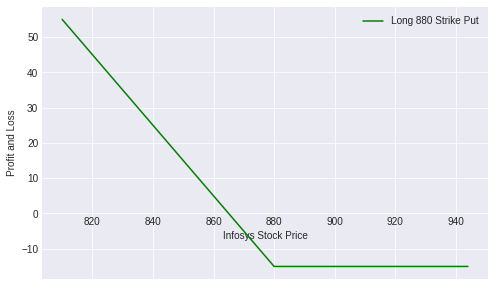

In [ ]:
payoff_long_put = put_payoff(sT, strike_price_long_put, premium_long_put)
# Plot
fig, ax = plt.subplots(figsize=(8,5))
ax.spines['bottom'].set_position('zero')
ax.plot(sT,payoff_long_put,label='Long 880 Strike Put',color='g')
plt.xlabel('Infosys Stock Price')
plt.ylabel('Profit and Loss')
plt.legend()
plt.show()

**Short 860 strike put payoff**

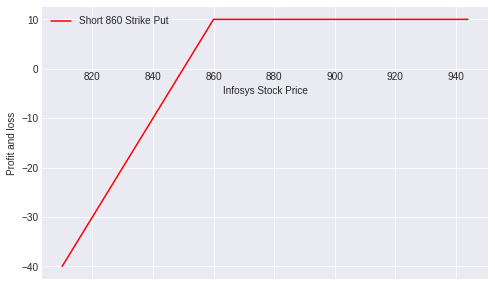

In [ ]:
payoff_short_put = put_payoff(sT, strike_price_short_put, premium_short_put) * -1.0
# Plot
fig, ax = plt.subplots(figsize=(8,5))
ax.spines['bottom'].set_position('zero')
ax.plot(sT,payoff_short_put,label='Short 860 Strike Put',color='r')
plt.xlabel('Infosys Stock Price')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()

**Bear put spread payoff**

Max Profit: 15.0
Max Loss: -5.0


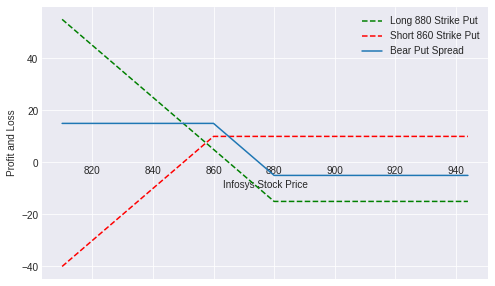

In [ ]:
payoff_bear_put_spread = payoff_long_put + payoff_short_put

print("Max Profit:", max(payoff_bear_put_spread))
print("Max Loss:", min(payoff_bear_put_spread))

#Plot
fig, ax = plt.subplots(figsize=(8,5))
ax.spines['bottom'].set_position('zero')
ax.plot(sT,payoff_long_put,'--',label='Long 880 Strike Put',color='g')
ax.plot(sT,payoff_short_put,'--',label='Short 860 Strike Put',color='r')
ax.plot(sT,payoff_bear_put_spread,label='Bear Put Spread')
plt.xlabel('Infosys Stock Price')
plt.ylabel('Profit and Loss')
plt.legend()
plt.show()

The max profit is capped at £15 and the max loss is limited to £5. Therefore, this strategy is suitable when your outlook is moderately bearish on the stock.

